In [0]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
# this is the size of our encoded representations
encoding_dim = 24
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

In [19]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# tensorboard = TensorBoard(write_graph=True, log_dir="/tmp/tensor-board/auto-encoders", histogram_freq=0)
autoencoder.fit(x_train, x_train,epochs=20,batch_size=256,shuffle=True,verbose=1, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3652 - val_loss: 0.2727
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2672 - val_loss: 0.2582
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2490 - val_loss: 0.2373
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2300 - val_loss: 0.2199
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2149 - val_loss: 0.2069
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2033 - val_loss: 0.1965
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1936 - val_loss: 0.1877
Epoch 8/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1857 - val_loss: 0.1810
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1794 - val_loss: 0.1753
Epoch

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

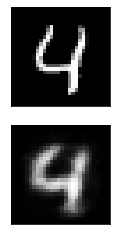

In [21]:
# use Matplotlib
import matplotlib.pyplot as plt

# displaying original and reconstructed image
n = 1  # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+4].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+4].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()